# Link: https://viblo.asia/p/tuan-1-gioi-thieu-xu-ly-anh-yMnKMdEQ57P
# Code Link: https://github.com/kingkong135/Viblo/tree/master
- Một ảnh có thể định nghĩa là hàm 2 chiều f(x, y).
- Ảnh số là số hóa làm cho một hình ảnh kỹ thuật số có trở thành 1 xấp xỉ của ảnh thực.

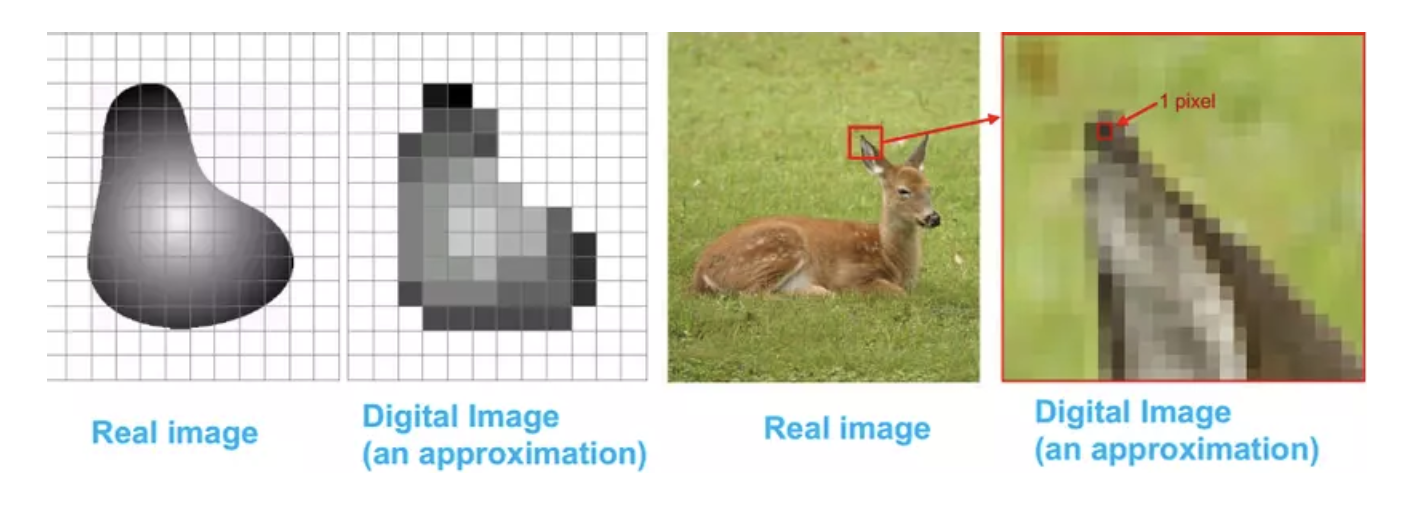

# Các định dạng phổ biển của ảnh số bao gồm:
Illumination: chiếu sáng.

1 giá trị trên điểm/pixel ( B&W hay Grayscale)
3 giá trị trên điểm/pixel (Red, Green, Blue)
4 giá trị trị trên điểm/pixel ( Red, Green, Blue, + “Alpha” or Opacity)

# Xử lý ảnh là gì?
Xử lý ảnh là thay đổi ảnh đầu vào để tạo ra một ảnh khác.

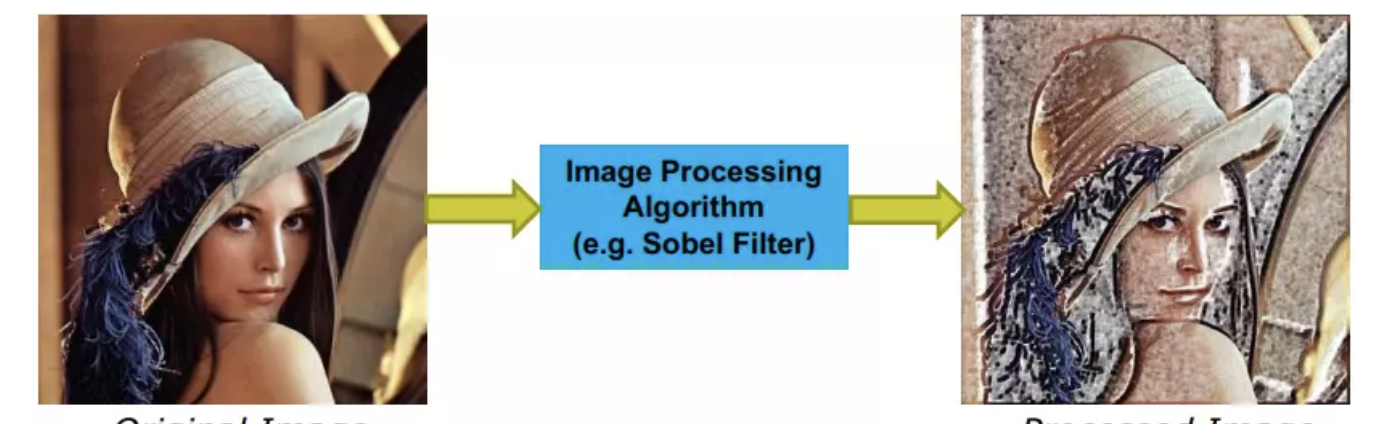

# Một số bài toán về xử lý ảnh:
1. Giảm nhiễu.
2. Điều chỉnh độ tương phản.
3. Tìm cạch.
4. Nén ảnh.
5. Phân vùng ảnh.
6. Khôi phục ảnh.

# Xử lý ảnh không phải và thị giác máy tính
Image processing: đầu vào là ảnh, đầu ra là ảnh.
Computer vision: đầu vào là ảnh, đầu ra là tri thức.

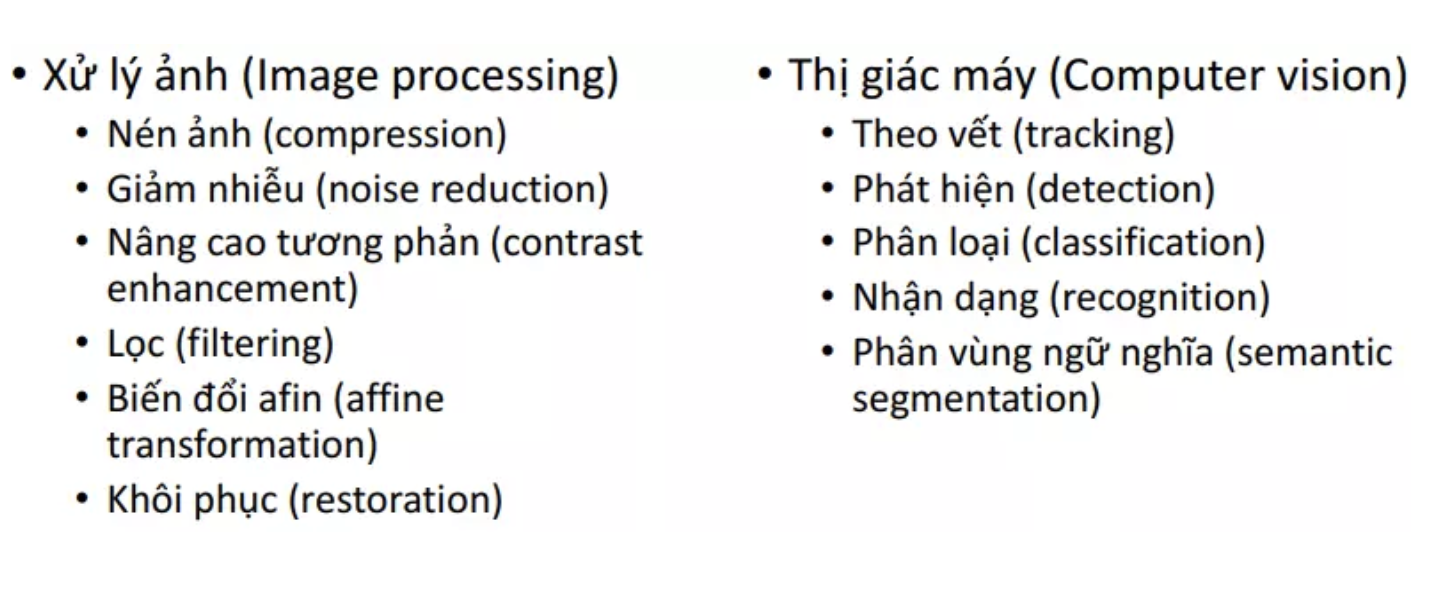

# Làm quen với thư viện openCV


(512, 512, 3)
786432


True

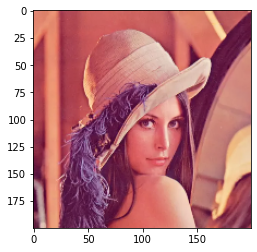

In [25]:
import cv2
cv2.__version__

iname = 'lena.webp'
#read image (đầu ra sẽ là một ma trận 3 chiều).
img = cv2.imread(iname)
# print (img)
print (img.shape)
print (img.size)

# Hiển thị lai hình ảnh
# Cách 1:
# cv2.imshow(window_name, image)
# cv2.imshow('test', img)

# Cách 2:
#to display at jupyter notebook
import matplotlib.pyplot as plt
#Note cv2 read BGR as default
plt.imshow(img)

# cv2 mặc định đọc màu theo thứ tự BGR
plt.imshow(img[:,:,::-1])

#crop image
crop = img[100:300, 100:300]
plt.imshow(crop[:,:,::-1])

# Chuyển vùng vừa crop thành màu xanh
copy = img.copy()
copy[100:300, 100:300] = [255, 0, 0] #assign blue color
plt.imshow(copy[:,:,::-1])

# resize
h, w = img.shape[:2]
resized = cv2.resize(img, (200, 200))
plt.imshow(resized[:,:,::-1])

# Lưu ảnh
# cv2.imwrite(filename, image)
cv2.imwrite("test.jpg", resized)


# Tuần 2: Phép toán với điểm - Điểu chỉnh độ tương phản
Khái niệm:
- Ảnh số là một hàm 2 chiều f(x, y)
- Có nhiều loại ảnh số: chụp hình cảm ứng ánh sáng, hoặc các loại sóng, hoặc hàm tùy chỉnh.

Số hóa ảnh:
Định nghĩa: số hóa ảnh là biến đổi một ảnh (một hàm liên tục) trong không gian thành dạng số rời rạc.

Có 2 bước số hóa ảnh:
- Lấy mẫu (sampling): đo giá trị các khoảng không gian.
- Lượng hóa (quantization): ánh xạ cường độ hoặc giá trị đo được thành một số hữu hạn các mức rời rạc.

Xử dụng gamma để điều chỉnh độ tương phản.
- Low exposure (anh có độ tương phản thấp (ảnh quá tối: cho gammma < 1 để chỉnh cho ảnh sáng hơn))
- Overexposure (ảnh có độ tương phản cao (ảnh quá sáng: cho gamma > 1 để chỉnh cho ảnh tối đi))

Correct using pixel transform

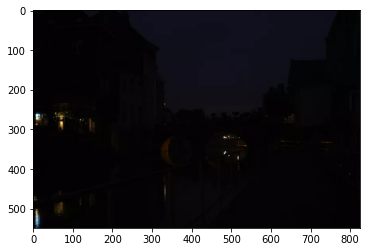

In [57]:
# 1. Low exposure (ảnh đầu vào có độ tương phản thấp)
import numpy as np
import matplotlib.pyplot as plt

def adjust_image_gamma(image, gamma = 1.0):
  image = np.power(image, gamma)
  max_val = np.max(image.ravel())
  image = image/max_val * 255
  image = image.astype(np.uint8)
  return image

#faster way to compute
#reference: https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)




iname = 'dark.webp'
#read image (đầu ra sẽ là một ma trận 3 chiều).
img = cv2.imread(iname)

plt.imshow(img[:,:,::-1])

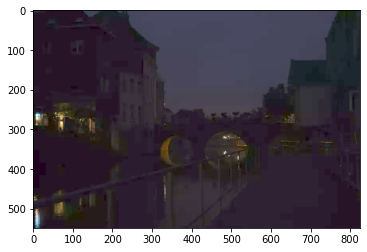

In [56]:
low_adjusted = adjust_image_gamma(img, 0.45)
plt.imshow(low_adjusted[:,:,::-1])

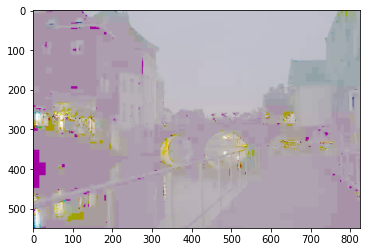

In [38]:
# what if gamma is too low? (ảnh sẽ bị quá sáng)
low_adjusted = adjust_image_gamma(img, 0.1)
plt.imshow(low_adjusted[:,:,::-1])

In [41]:
# đo thời gian chạy của hàm trong python
%timeit low_adjusted = adjust_image_gamma(img, 0.1)
# kq: 1 loop, best of 3: 2.51 s per loop

# Kết quả cho thấy việc đó rất tốn thời gian

10.6 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
# đo thời gian chạy của hàm trong python
%timeit low_adjusted = adjust_image_gamma_lookuptable(img, 0.1)
# kq: 1 loop, best of 3: 2.51 s per loop

333 µs ± 8.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


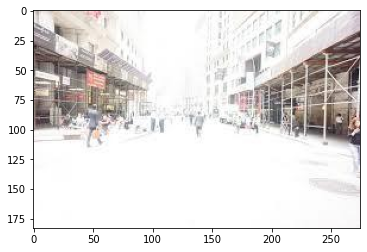

In [62]:
# 2. Ảnh đầu vào có độ tương phản cao (Overexposure)
# Trong trường hợp này sẽ giảm độ sáng và tăng độ tối lên (gammma > 1)
iname = 'light.jpeg'
#read image (đầu ra sẽ là một ma trận 3 chiều).
img = cv2.imread(iname)
plt.imshow(img[:,:,::-1])

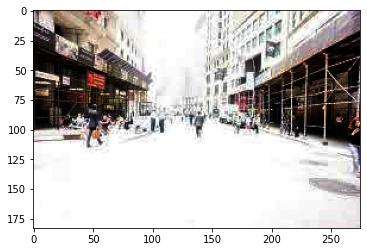

In [63]:
adjusted_high = adjust_image_gamma_lookuptable(img, 4)
plt.imshow(adjusted_high[:,:,::-1])


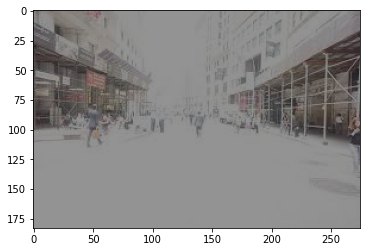

In [64]:
# Correct using pixel transform
def pixel_transform(image, alpha = 1.0, beta = 0):
 '''
 out[pixel] = alpha * image[pixel] + beta
 '''
 output = np.zeros(image.shape, image.dtype)
 h, w, ch = image.shape
 for y in range(h):
   for x in range(w):
     for c in range(ch):
       output[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

 return output

transformed_high = pixel_transform(img, 0.5, 20)
plt.imshow(transformed_high[:,:,::-1])

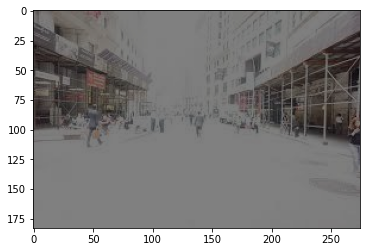

In [66]:
#anyway, a faster (dùng thư viện opencv để nhanh hơn) 
transformed_high = cv2.convertScaleAbs(img, 20, 0.5)
plt.imshow(transformed_high[:,:,::-1])


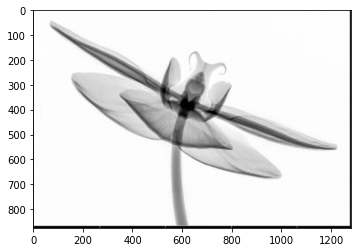

In [68]:
# Image negative (Chuyển ảnh từ trái sang phải, đổi đen thành trắng và ngược lại).
xray = cv2.imread('xray.jpg')
negation = 255 - xray
plt.imshow(negation, cmap='gray')

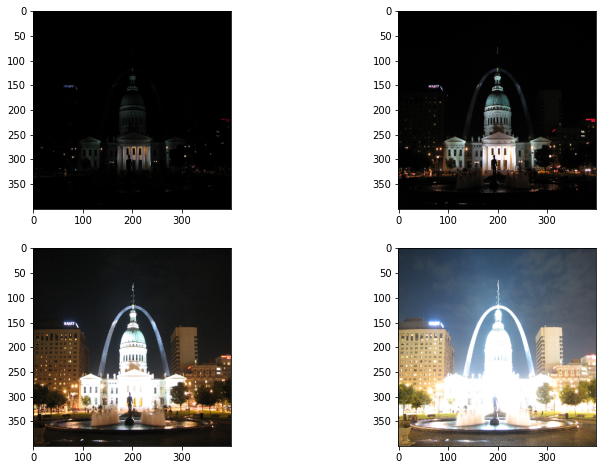

In [79]:
import numpy as np

width = 400
height = 400

# Kết hợp 4 ảnh để tạo ra ảnh có dộ sáng trung bình
hdr1 = cv2.resize(cv2.imread("hdr1.jpeg"), (width, height))
hdr2 = cv2.resize(cv2.imread("hdr2.jpeg"), (width, height))
hdr3 = cv2.resize(cv2.imread("hdr3.jpeg"), (width, height))
hdr4 = cv2.resize(cv2.imread("hdr4.jpeg"), (width, height))

stack = np.stack([hdr1, hdr2, hdr3, hdr4], axis = 0)
stack.shape

plt.rcParams['figure.figsize'] = [12, 8]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(stack[i][:,:,::-1])


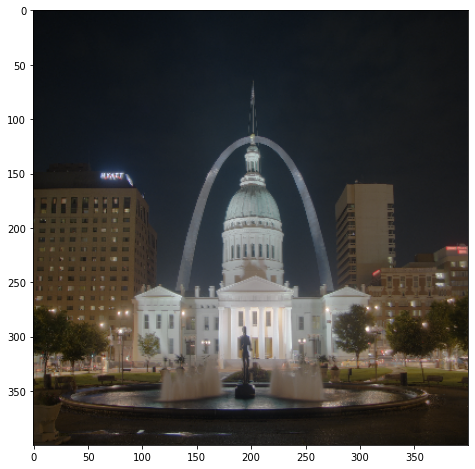

In [80]:
#Averaging to enhance contrast
hdr = np.mean(stack, axis=0)
hdr = hdr.astype(np.uint8)
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(hdr[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


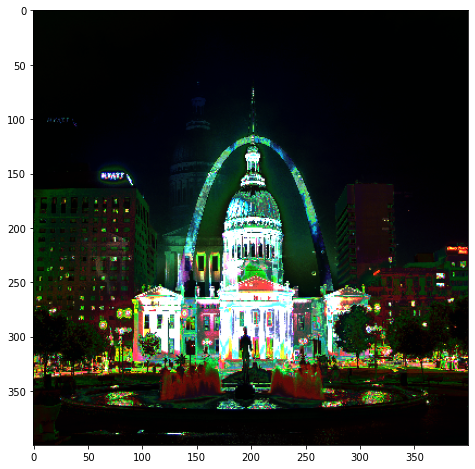

In [81]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(stack, stack)
# Obtain Camera Response Function (CRF)
times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32) #exposure time of each image, known from metadata
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(stack, times)

mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(stack, times, responseDebevec)
plt.imshow(hdrDebevec[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


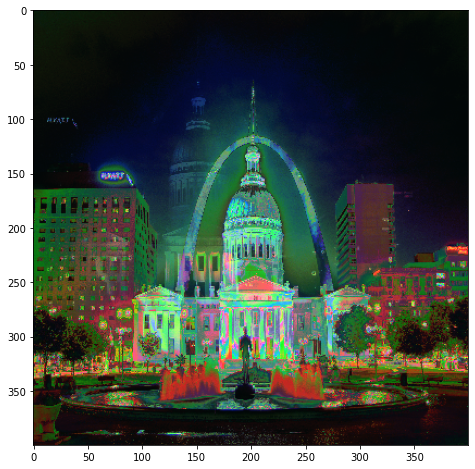

In [82]:
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.imshow(ldrDrago[:,:,::-1])

In [ ]:
# Phép trừ ảnh
# Video background subtraction

# Histogram - Histogram equalization
Histogram, cân bằng biểu đồ mức xám, phân loại ảnh sử dụng histogram

Lấy mẫu, lượng tử hóa.
Biến đổi trên điểm ảnh -> chỉnh độ sáng, độ tương phản.
    + Gamma
    + Negation
Kết hợp ảnh:
    + Tính trung bình
    + Trừ background

Histogram (lược đồ xám) là biểu đồ tần xuất thống kê tần xuất xuất hiện các mức sáng trong ảnh.
+ rk: là mức sáng của ảnh f(x, y).
+ nk: số điểm ảnh (pixels) có giá trị rk.
+ Biểu đồ xám chưa chuẩn hóa (unnormalized histogram) 

Code Có hai cách để dùng hàm histogram
1. Sử dụng cv2.calcHist từ thư viện OpenCV
2. Sử dụng hàm numpy.histogram

Histogram equalization (Cân bằng biểu đồ mức xám)


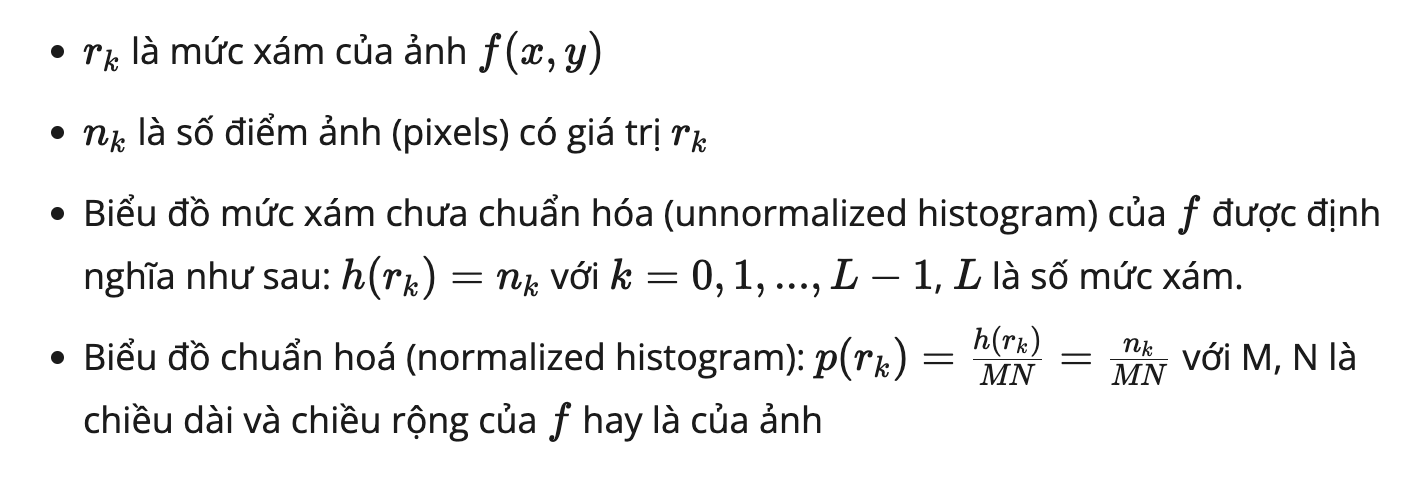

In [83]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]
img = cv2.imread("dark.webp", 0)

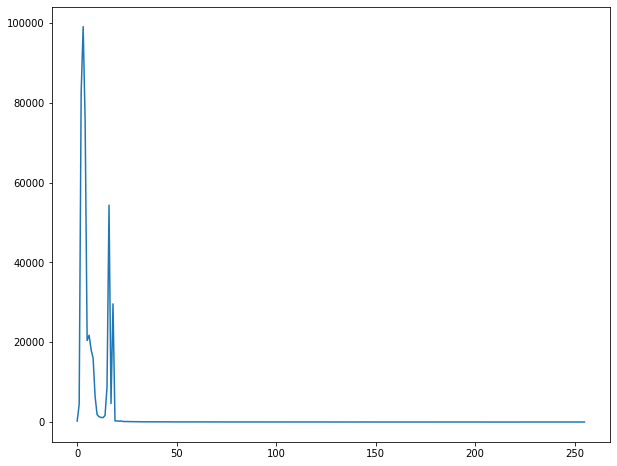

In [84]:
# 1. Sử dụng cv2.calcHist từ thư viện OpenCV
# using cv2.calcHist()
hist = cv2.calcHist(
      [img],
      channels = [0],
      mask=None, # full image
      histSize=[256], #full scale
      ranges=[0,256]
)
plt.plot(hist)


(256,)


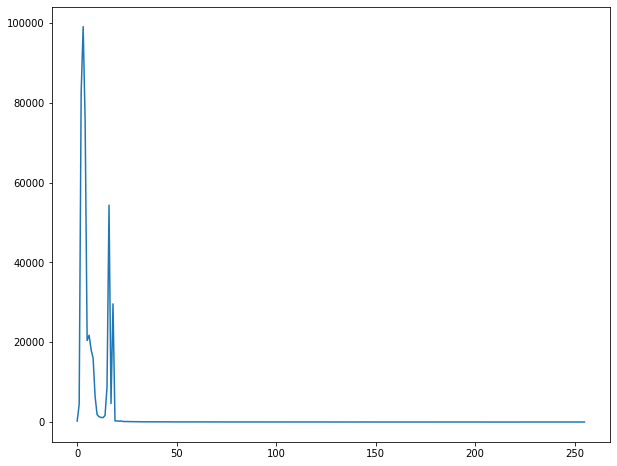

In [85]:
# 2. Sử dụng hàm numpy.histogram
#using numpy
h2 = np.histogram(img.ravel(), bins=256, range=[0,256])
print(h2[0].shape)
plt.plot(h2[0])


In [92]:
# Cân bằng histogram (cách sử dụng thủ công)
def hist_equalize(img):
  # 1. calclate hist
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])

  # 2. normalize hist
  h, w = img.shape[:2]
  hist = hist/(h*w)

  # 3. calculate CDF
  cdf = np.cumsum(hist)
  s_k = (255 * cdf - 0.5).astype("uint8")
  return s_k

def plot_img_and_hist(img):
  '''Draw image together with its histogram and cdf'''
  hist = cv2.calcHist(
              [img],
              channels=[0],
              mask=None, #full image
              histSize=[256], #full scale
              ranges=[0,256]
  )
  h,w = img.shape[:2]
  normalized_hist = hist/(h*w)
  cdf = normalized_hist.cumsum()
  plt.subplot(1,2,1)
  plt.imshow(img, cmap = 'gray')
  plt.subplot(1,2,2)
  plt.plot(normalized_hist, 'r')
  plt.plot(cdf, 'b--')
  plt.legend(('histogram', 'cdf'), loc = 'upper left')


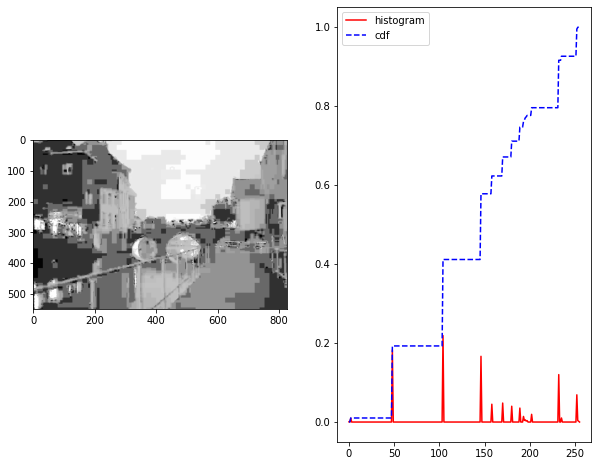

In [93]:
# Ánh xạ mức xám đầu vào với sk
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

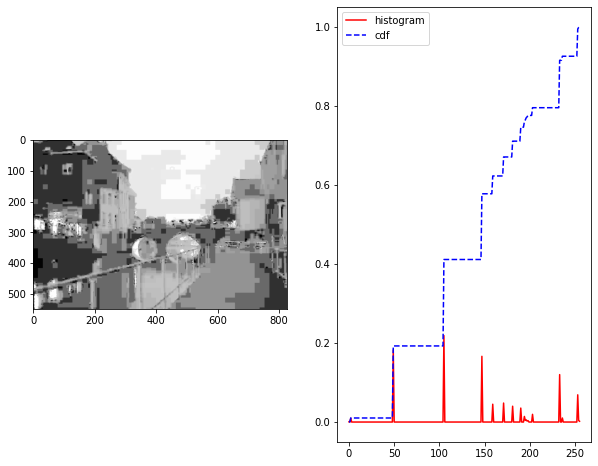

In [94]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)


# Spatial Filtering (các phép lọc trong không gian điểm ảnh)
- Neighbors of pixels: Có nhiều định nghĩa về lân cận của một điểm ảnh hay dùng nhất là 4 - neighbors, 8 - neighbors
- Distance between two pixels

Spatical filter kernel (hạt nhân lọc không gian) hay còn gọi là mask, template, window, filter, kernel nó chỉ là một ma trận mà kích thước của nó định nghĩa lân cận của phép toán mà mình áp dụng và giá trị của từng phần tử thể hiện bản chất của filter.

Linear spatial filtering mechanism (cơ chế biến đổi tuyến tính): 

Spatial filter kernels:
- Filter design:
    Dựa trên các tính chất toán học:
        + Một bộ lọc tích trung bình của các pixels lân cận sẽ làm mờ ảnh.
        + Một bộ lọc tính đạo hàm cục bộ sẽ làm rõ ảnh.
    Dựa trên việc lấy mẫu một hàm trong không gian 2D mà hình dạng có thuộc tính mong muốn.
        + Lấy mẫu từ hàm Gaussian để xây dựng bộ lọc trung bình trọng số.
    Dựa trên Frequency Response (Fourer Transform):
- Smoothing Filter:
    Được sử dụng để giảm chuyển đổi sắc nét về cường độ:
        + Giảm chi tiết không liên quan trong ảnh (nhiễu)
        + Làm mịn các đường viền sai do sử dụng không đủ số mức cường độ trong ảnh.
    Một số filter kernel:
        + Mean filter/Box filter: Ý tưởng của mean filter là thay thế các điểm ảnh bằng giá trị trung bình của các điểm ảnh lân cận.
        + Lowpass Gaussian Filter.
        + Order-statistic (phi tuyến) filter.


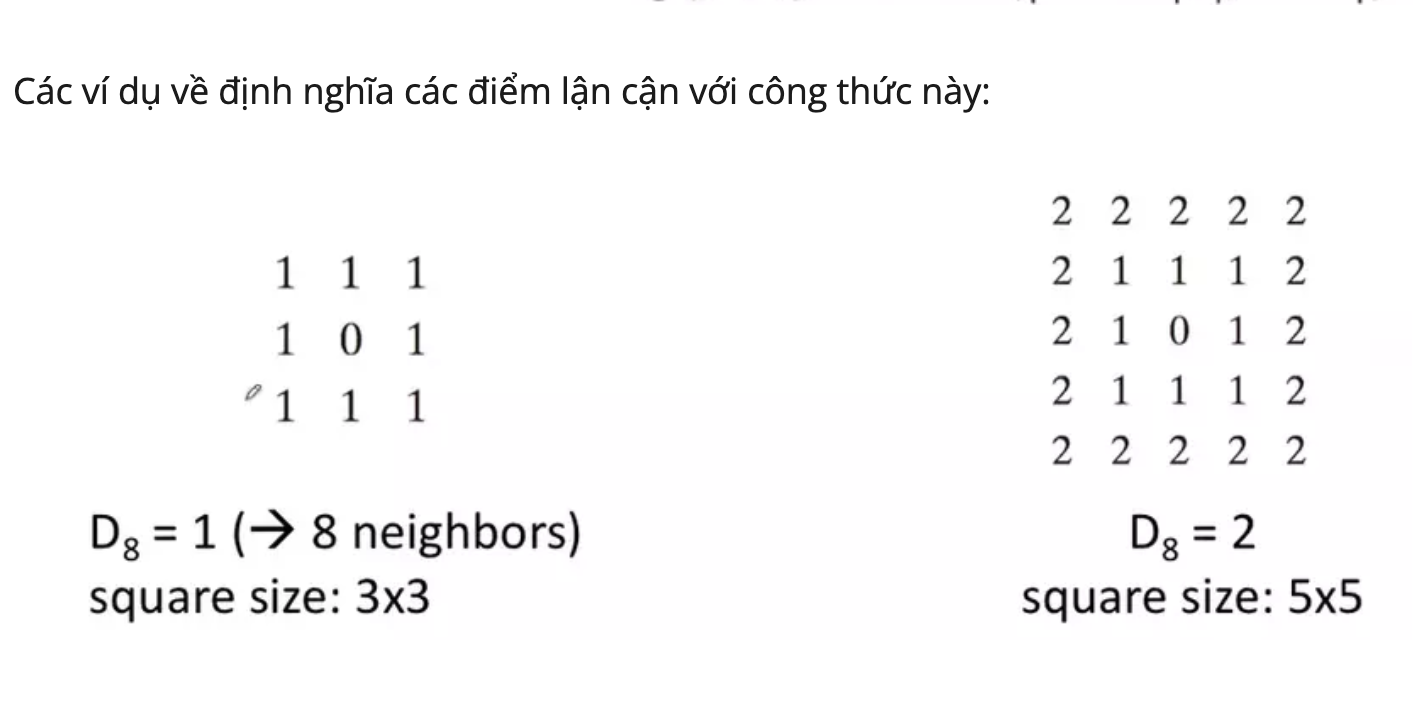

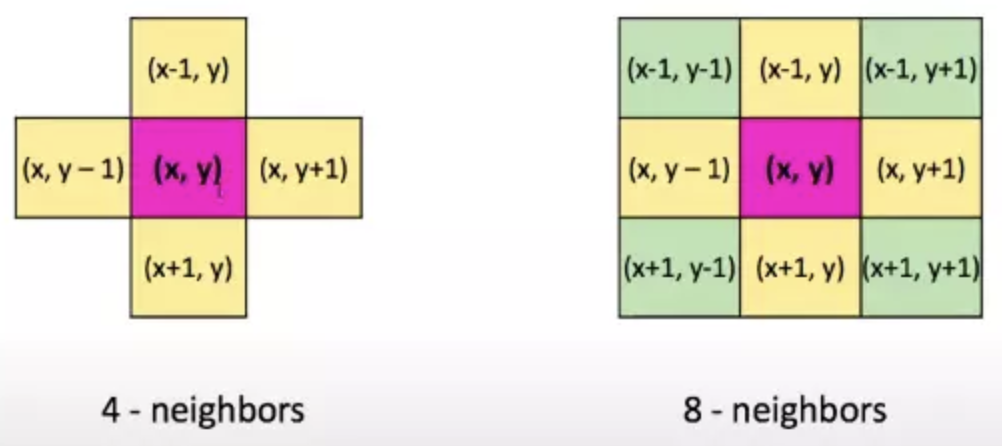

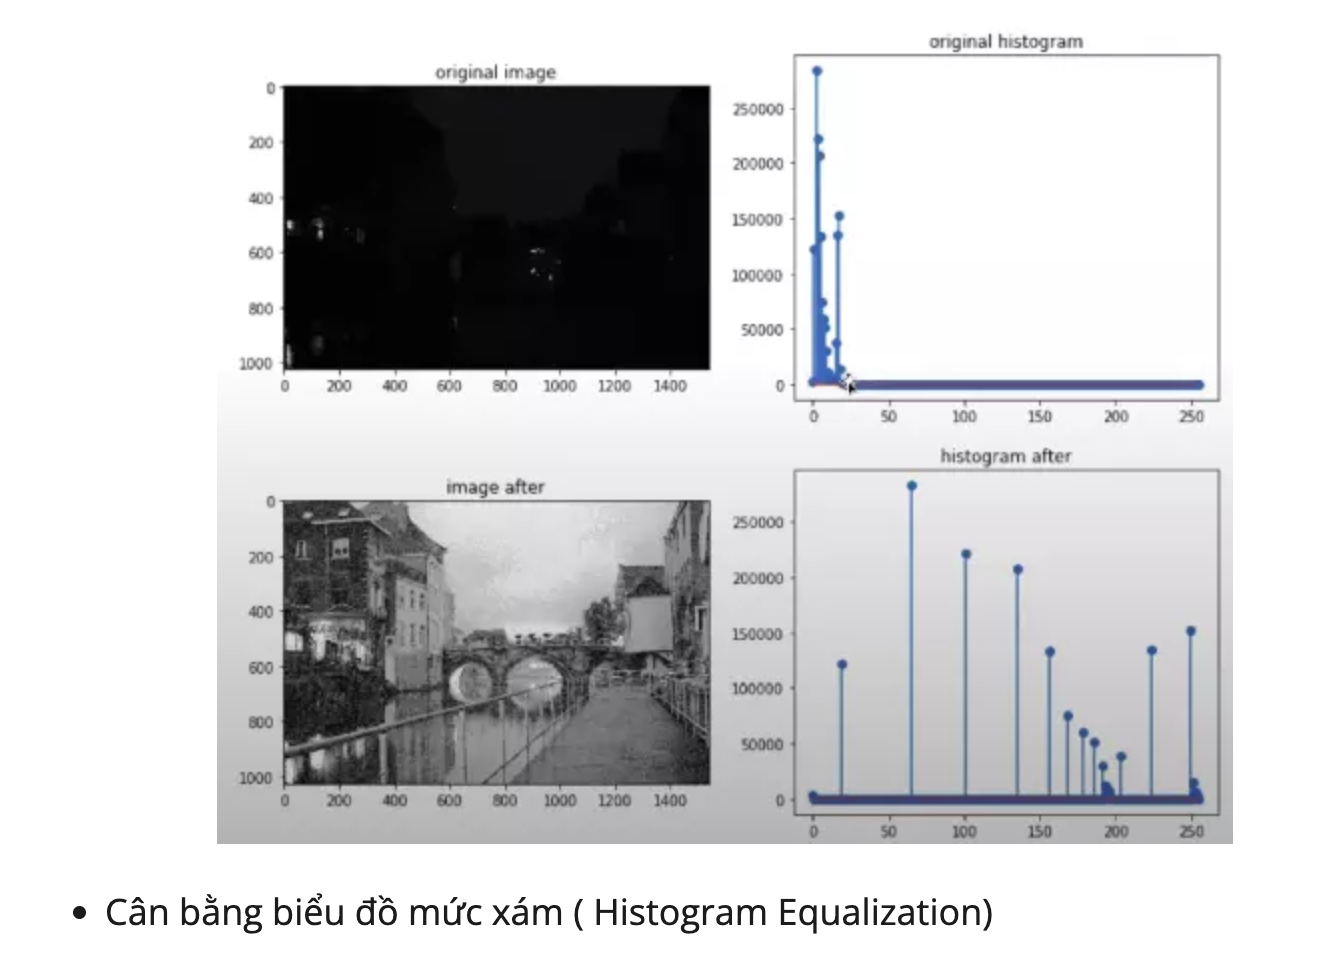